In [1]:
import sys
import os
from os.path import join

project_root = os.path.dirname(os.path.abspath('..')) 

if project_root not in sys.path:
    sys.path.append(project_root)

from src.NeuralNetwork import NeuralNetwork
from src.layers import ConvolutionalLayer, FlattenLayer, DenseLayer
from data.MnistDataloader import MnistDataloader
import numpy as np
import random
import matplotlib.pyplot as plt

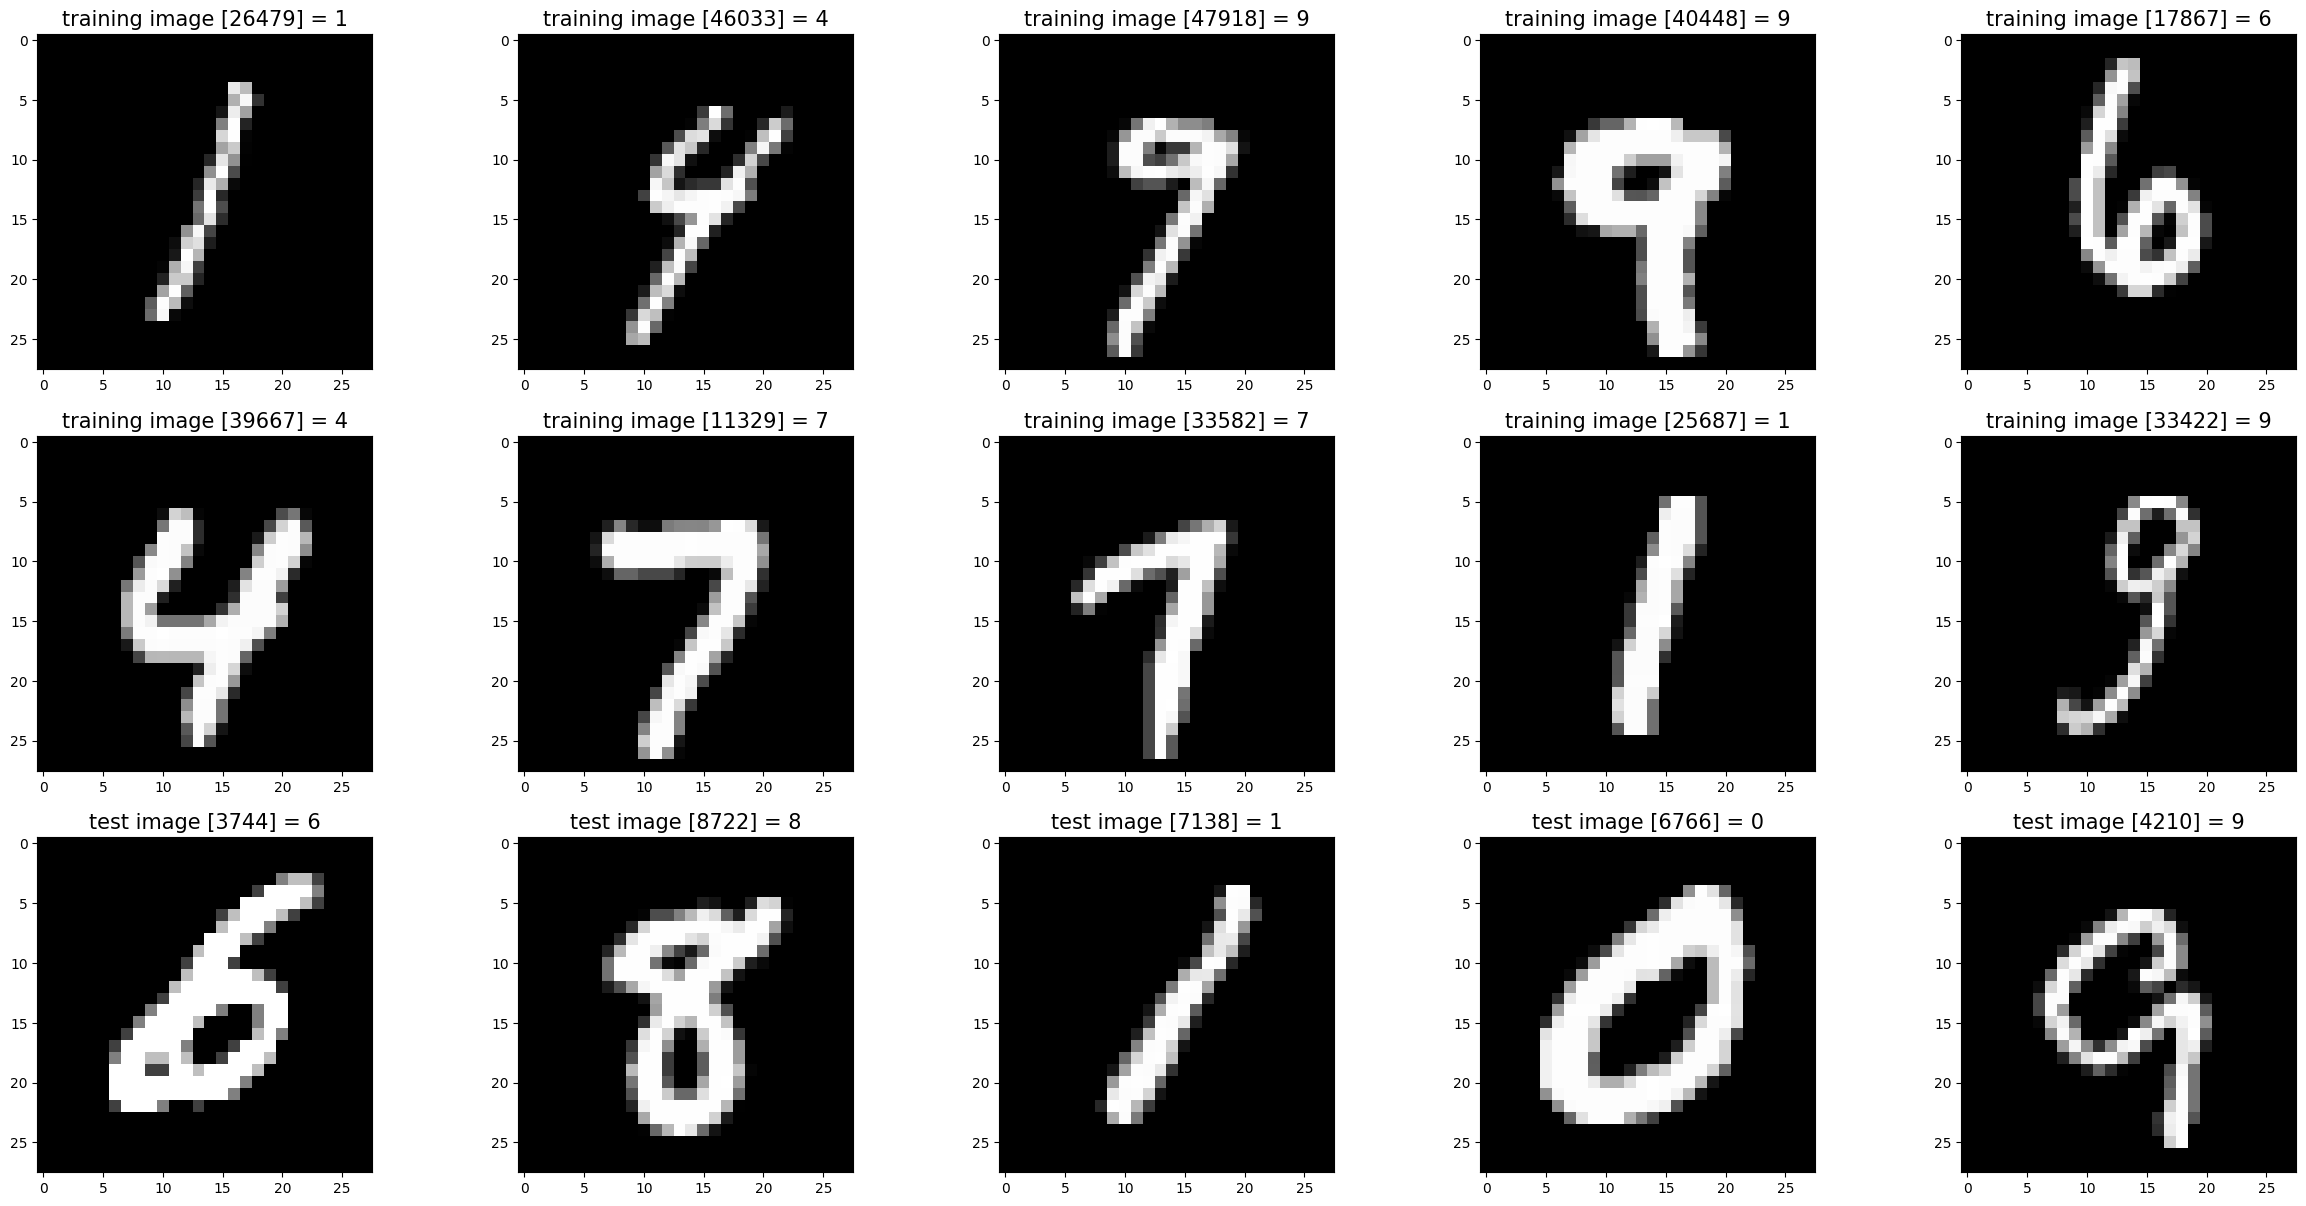

In [2]:
input_path = '../../data/input'
training_images_filepath = join(input_path, '../../data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, '../../data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, '../../data/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, '../../data/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [3]:
image = np.array(images_2_show)
image.shape

(15, 28, 28)

In [4]:
image_batch = np.array([
  image,
  image,
  image,
  image,
  image
])

In [5]:
image_batch.shape

(5, 15, 28, 28)

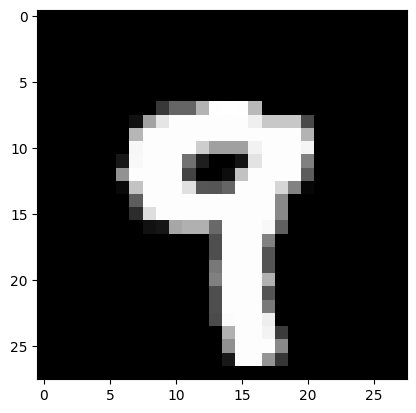

In [6]:
plt.imshow(image_batch[0][3], cmap=plt.cm.gray)

In [7]:
X_train = np.random.normal(size=(100, 5, 3, 3))
y_train = np.random.normal(size=(3, 100))

In [8]:
layers = [
  ConvolutionalLayer(
    name = "Convolution 1",
    activation_name = "relu",
    output_channels_dim=3,
  ),
  ConvolutionalLayer(
    name = "Convolution 2",
    activation_name = "relu",
    output_channels_dim=3,
  ),
  ConvolutionalLayer(
    name = "Convolution 3",
    activation_name = "relu",
    output_channels_dim=3,
  ),
  FlattenLayer(
    name="Flatten 1",
  ),
  DenseLayer(
    name="Dense 1",
    activation_name="softmax",
    output_dim=3
  )
]

In [9]:
nn = NeuralNetwork(
  layers = layers,
  loss_type="cce",
  optimizer_type="adam",
  seed=1
)

In [10]:
nn.build((
  X_train.shape[1],
  X_train.shape[2],
  X_train.shape[3]
))

In [11]:
nn.train(X_train, y_train, epochs=20)

In [12]:
nn.layers[-1].cache

{'Z': array([[ -960.01695282, -1136.06313653,    36.17955967,  -340.14173714,
           -35.53055925,  -198.64562222,  -449.58777328,   -79.49756596,
           -31.72223458,  -494.75208979,  -148.30308311,  -976.88354732,
          -265.94394471,  -232.31459061,  -389.82035124,  -584.43274547,
          -240.45119796,  -483.41688091,   -32.45558921,  -185.58059224,
          -829.90762687,  -447.71571034,  -709.15675963,  -740.12735532,
          -193.10297918,  -269.1121131 ,   -18.24347269,  -158.7350236 ,
          -868.26454579,  -403.42896106,  -910.73340814,  -304.34353097],
        [ -519.13574775,  -762.98016975,   -88.38310279,  -171.83826984,
          -182.53233196,     1.67564855,  -198.26163609,   186.25775777,
            21.56476316,  -298.72243175,  -228.21985455,  -263.20763615,
          -129.75115358,  -253.48453989,  -220.78336047,  -352.88724245,
           -43.84937734,  -360.06318507,    34.39545464,   -72.68352327,
          -466.28655392,  -503.50418013,  -36